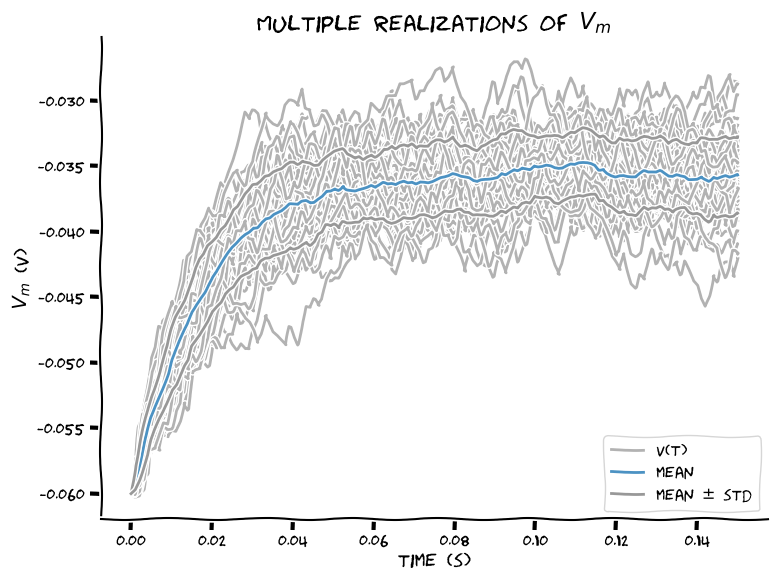

In [1]:
#using numpy

import numpy as np
import matplotlib.pyplot as plt
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
#import ipywidgets as widgets  # interactive display
#%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

# Plot figure
with plt.xkcd():
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  plt.plot(t_range, v_n.T, 'k', alpha=0.3)

  plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
  plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
  plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
  plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

  plt.legend()
  plt.show()


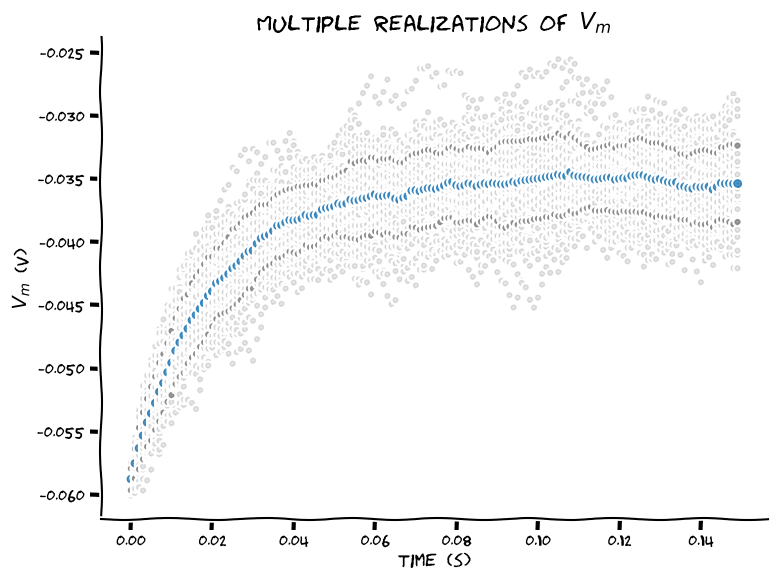

In [2]:
# not using numpy
import numpy as np
import matplotlib.pyplot as plt
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
#import ipywidgets as widgets  # interactive display
#%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    # Compute sample mean
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v - v_mean)**2 for v in v_n]

    # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n) / (n - 1)

    # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

    # Plot mean + standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8)

    # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)


  # Display plot
  plt.show()
